
## Modes propres de vibration d’un diapason

En première approximation, on peut modéliser un diapason comme l’assemblage de deux poutres, chacune de ces poutres possédant une extrémité fixe et une extrémité libre. Les vibrations $y(x)$ transverses le long de chaque barre vérifient l’équation suivante :
$$
\dfrac{\partial^{4}y}{\partial x^{4}}=-\dfrac{\rho}{E\kappa^{2}}\dfrac{\partial^{2}y}{\partial t^{2}}
$$

Avec les conditions limites suivantes où la barre est fixe à l'extrémité $x=0$ et libre en $x=L$ qui sont: 

\begin{eqnarray*}
y(x=0)=0 \quad & \quad\left.\dfrac{\partial^{2}y}{\partial x^{2}}\right|_{x=L}\!\!=0 \\
\left.\dfrac{\partial y}{\partial x}\right|_{x=0}\!\!=0\quad & \quad\left.\dfrac{\partial^{3}y}{\partial x^{3}}\right|_{x=L}\!\!=0, 
\end{eqnarray*}

on peut montrer que les fréquences $\nu_{i}$ des modes propres sont déterminées par l'équation suivante : 

\begin{equation}
\nu_{i}=\dfrac{\pi}{2\ell^{2}}\sqrt{\dfrac{E\kappa^{2}}{\rho}}\,\beta_{i}^{2}
\end{equation}

où $\beta_{i}$ est solution de 

\begin{equation}
\cosh{(\pi\beta_{i})}\cos{(\pi\beta_{i})}=-1
\end{equation}

et $E$ est le module d'Young du matériau, $\rho$ sa masse volumique, $\ell$ la longueur du diapason et $\kappa$ 
une constante caractéristique de la section du diapason. Les caractéristiques d'un diapason en fer sont listées dans la table ci-dessous :

Nom      | Valeur      &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
------|------|
densité | $\rho= 7874\,\text{kg}/\text{m}^{3}$ |
**Module d'Young** | $E=196\,\text{GPa}$ |
Section circulaire | $r=5\,\text{mm}$ |
constante | $\kappa=r/2=2.5\,\text{mm}$| 
longueur |  $\ell=12.6\,\text{cm}$ | 


1. Pour trouver les fréquences propres du diapason, il faut trouver les zéros de la fonction $f(\beta)=\cosh(\pi\beta)\cos(\pi\beta)+1$.
On notera $\beta_{1}$,  $\beta_{2}$, …les racines positives par ordre croissant. Cette fonction ayant des variations très importantes autour du zéro, on cherchera plutôt les zéros de la fonction 
\begin{equation}
g(\beta)= f(\beta) \exp^{-\beta}.
\end{equation} 

Pourquoi est-ce que les zéros de $g$ sont les mêmes que ceux de $f$? Tracez les fonctions $f(\beta)$ et $g(\beta)$, et proposez l'expression analytique vers laquelle tend $\beta_{i}$ pour les grandes valeurs de $i$.

2.  Recherchez les premières solutions $\beta_{1}$, $\beta_{2}$, $\beta_{3}$ de l'équation (\ref{eq:diapason}) à l'aide de la méthode de la dichotomie. Déduisez-en la fréquence $\nu_{1}$ du fondamental et les fréquences $\nu_{2}$, $\nu_{3}$, $\ldots$ des premiers harmoniques du diapason considéré.

3.  Essayez d'appliquer la méthode de Newton-Raphson à ce problème. Commentez.

## Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson(f,fprime,x,eps,cmax):
# Newton_Raphson amélioré avec la prise en compte du compteur.
    compteur = 0
    y = f(x)    
    while ( abs(y) > eps and compteur < cmax):
        compteur=compteur+1
        x = x - y/fprime(x);
        y = f(x)
    return x, compteur;

def dichotomie (f,a,b,epsilon,cmax): 
# Méthode de dichotomie améliorée avec la prise en compte d'un compteur 
# et un critère de convergence sur x
    
    if f(a)*f(b) >= 0:
        print("Pas de 0 dans l'intervalle [",a,";",b,"]")
        return float('NaN')  # None #
    else:
        compteur = 0

        x1 = a
        x2 = b
        x = 0.5*(x1+x2)
        while x2-x1>epsilon:
            compteur=compteur+1
            if compteur > cmax:
                print("Limite du compteur atteinte")
                break
            if f(x1)*f(x) < 0:
                x2 = x
            else:
                x1 = x
            x = 0.5*(x1+x2)    
        #print(f"Résultat obtenu en {compteur:3d} itérations (cmax={cmax:3d}).")
    return x, compteur

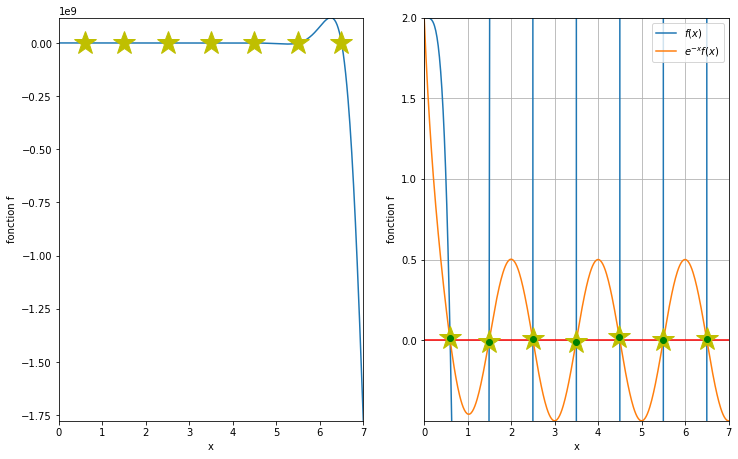

In [2]:
def fdiapason(x):
    f = np.cosh(np.pi*x)*np.cos(np.pi*x)+1
    return f

def fdiapason2(x):
    f = np.cosh(np.pi*x)*np.cos(np.pi*x)+1
    f = f*np.exp(-np.pi*x)
    return f


x =  np.linspace(0,7, num=500)
y = fdiapason(x)
y2 = fdiapason2(x)

Nor=1.618
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,12/Nor))

ax[0].set_xlabel("x")
ax[0].set_ylabel("fonction f")
ax[1].set_xlabel("x")
ax[1].set_ylabel("fonction f")

ax[0].plot(x,y,'-', label=r'$f(x)$')
ax[0].set_xlim(min(x), max(x))
ax[0].set_ylim(min(y), max(y))
idx = np.argwhere(np.diff(np.sign(y - 0))).flatten()
ax[0].plot(x[idx], y2[idx], '*y',markersize=24)

ax[1].set_xticks(np.arange(0, 15, step=1))

ax[1].plot(x,y,'-', label=r'$f(x)$')
ax[1].plot(x,y2,'-', label=r'$e^{-x}f(x)$')
ax[1].plot(x,0*y,'-r')
ax[1].grid(True)
ax[1].set_xlim(min(x), max(x))
ax[1].set_ylim(min(y2), max(y2))

idx = np.argwhere(np.diff(np.sign(y - 0))).flatten()
ax[1].plot(x[idx], y2[idx], '*y',markersize=24)

idx2 = np.argwhere(np.diff(np.sign(y2 - 0))).flatten()
ax[1].plot(x[idx2], y2[idx2], 'og')

ax[1].legend()
plt.show()

In [3]:
print(x[idx2])
for i in range(len(x[idx2])):
    print(x[idx2[i]] - (0.5+i))

print("")    
print("La relation est donc 1/2 + n")
print("Les zéros de cos(pi x) cosh(pi x) sont n + 1/2 avec n entier. L'effet du +1 est de décaler ces zéros une fois à gauche, une fois à droite. On pourra chercher les solutions dans les intervalles [n; n + 1].")

[0.58917836 1.48697395 2.49699399 3.49298597 4.48897796 5.498998
 6.49498998]
0.08917835671342689
-0.013026052104208485
-0.0030060120240480437
-0.007014028056112398
-0.011022044088176308
-0.0010020040080158665
-0.005010020040080221

La relation est donc 1/2 + n
Les zéros de cos(pi x) cosh(pi x) sont n + 1/2 avec n entier. L'effet du +1 est de décaler ces zéros une fois à gauche, une fois à droite. On pourra chercher les solutions dans les intervalles [n; n + 1].


In [4]:
# Fonctions tests
eps = 1.e-8
cmax=100

rho=7874;
E=196e9;
r=5e-3;
kappa=r/2.;
L=12.6e-2;
fact=np.pi*kappa/(2.*L*L)*np.sqrt(E/rho); 

imax = 6
for i in range(imax):
    a = i; b = i+1
    beta0, compteur = dichotomie(fdiapason,a,b,eps,cmax)
    freq = beta0*beta0*fact
    if freq < 1000:
        print(f"Fréquences du diapason (Hz): {freq:6.1f}")
    else:     
        print(f"Fréquences du diapason (kHz): {freq/1000:6.3f}")


print("L'oreille humaine perçoit les sons de 20 Hz à 20 000 Hz (approximativement)"+\
      " et le la a une fréquence de 440 Hz, ce qui est notre premier résultat et le seul audible !")    

Fréquences du diapason (Hz):  439.6
Fréquences du diapason (kHz):  2.755
Fréquences du diapason (kHz):  7.715
Fréquences du diapason (kHz): 15.118
Fréquences du diapason (kHz): 24.990
Fréquences du diapason (kHz): 37.331
L'oreille humaine perçoit les sons de 20 Hz à 20 000 Hz (approximativement) et le la a une fréquence de 440 Hz, ce qui est notre premier résultat et le seul audible !


In [5]:
def df(x):
    pix=np.pi*x;
    y = np.pi*(-np.pi*np.sin(pix)*np.cosh(pix)+np.cos(pix)*np.sinh(pix));
    return y

print("La méthode de Newton ne marche pas bien avec un point au hasard car les variations de la dérivée sont fortes. Par contre, si l'on part de π/2 + n (-1), cela converge bien.")

x0 = 1.8 ; print("Valeur initiale", x0*x0*fact)
beta0, compteur = newton_raphson(fdiapason,df,x0,eps,cmax)
freq = beta0*beta0*fact
print(f"convergence de newton pour x0=1, {freq:12.6f}")

for i in range(imax):
    x0 = -1+np.pi/2+i
    beta0, compteur = newton_raphson(fdiapason,df,x0,eps,cmax)
    freq = beta0*beta0*fact
    if freq < 1000:
        print(f"Fréquences du diapason (Hz): {freq:6.1f}")
    else:     
        print(f"Fréquences du diapason (kHz): {freq/1000:6.3f}")



La méthode de Newton ne marche pas bien avec un point au hasard car les variations de la dérivée sont fortes. Par contre, si l'on part de π/2 + n (-1), cela converge bien.
Valeur initiale 3998.472708778048
convergence de newton pour x0=1,  2755.195462
Fréquences du diapason (Hz):  439.6
Fréquences du diapason (kHz):  2.755
Fréquences du diapason (kHz):  7.715
Fréquences du diapason (kHz): 15.118
Fréquences du diapason (kHz): 24.990
Fréquences du diapason (kHz): 37.331
